Estimated number of clusters: 3
Estimated number of noise points: 20


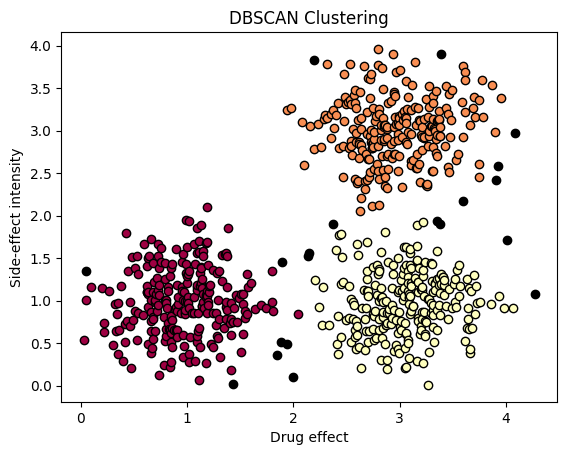

In [ ]:
# Data Science for Medicine and Biology
#
# Nezu Life Sciences
#
# Feel free to modify, redistribute and above all,
# create something with this code.
#
# Tiago Lopes, PhD
# March 2024

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN

# Reads an input file
fileName = "https://raw.githubusercontent.com/Nezu-life/Data_Science_For_Medicine_and_Biology/main/datasets/antiinflammatory_drug.csv"
data = pd.read_csv(fileName, header=0)

X = data.drop(['patientID'], axis=1)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = np.amax(labels) + 1
n_noise_ = list(labels).count(-1)

# Output data frame
outputDF = data
outputDF['cluster'] = labels
outputDF.to_csv("DBSCAN_output.csv", index=False)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

# Use the labels from your DBSCAN to create a set of unique labels
unique_labels = set(labels)

# Generate different colors for each cluster
colors = [plt.cm.Spectral(i / len(unique_labels)) for i in range(len(unique_labels))]

# Plot each cluster
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black color for noise
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask]
    plt.plot(xy.iloc[:, 0].values, xy.iloc[:, 1].values, 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering')
plt.xlabel("Drug effect")
plt.ylabel("Side-effect intensity")

plt.show()




